In [1]:
# Importing Packages
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML  # To embed html into python output
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
# Set all the constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [9]:
# Loading the data using Image Data Generator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10,
    validation_split=0.2  # Set validation split
)

train_generator = train_datagen.flow_from_directory(
    "D:/Downloads/Potato_img",
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode='sparse',
    subset='training', # set as training data
    # save_to_dir = 'D:/Downloads/train_aug_potato' # use this code if you want to save all augmented images.
)

validation_generator = train_datagen.flow_from_directory(
    "D:/Downloads/Potato_img",
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse", 
    subset = 'validation' # set as test data
)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
# To view data present in train_generator:
# since it is a data_generator, we hv to use for loop and break.
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.61960787 0.6117647  0.6666667 ]
  [0.61960787 0.6117647  0.6666667 ]
  [0.61960787 0.6117647  0.6666667 ]
  ...
  [0.55358285 0.5378966  0.59279853]
  [0.50494415 0.4892578  0.5441598 ]
  [0.427451   0.41176474 0.4666667 ]]

 [[0.6122276  0.6043845  0.65928644]
  [0.6133711  0.60552794 0.66042995]
  [0.6145146  0.60667145 0.66157347]
  ...
  [0.54672176 0.5310355  0.5859375 ]
  [0.4929372  0.47725093 0.5321529 ]
  [0.427451   0.41176474 0.4666667 ]]

 [[0.61541295 0.6075698  0.6624718 ]
  [0.6148412  0.6069981  0.66190004]
  [0.61426944 0.6064263  0.66132826]
  ...
  [0.5398607  0.52417445 0.5790764 ]
  [0.4809303  0.46524402 0.520146  ]
  [0.427451   0.41176474 0.4666667 ]]

 ...

 [[0.7222664  0.71442324 0.7654036 ]
  [0.71174085 0.7038977  0.7548781 ]
  [0.7430234  0.7351802  0.78616065]
  ...
  [0.57254905 0.5596965  0.6131816 ]
  [0.57254905 0.558553   0.61260986]
  [0.57254905 0.5574094  0.6120381 ]]

 [[0.70682895 0.6989858  0.74996626]
  [0.7174584  0.7096153  0.7605957 ]


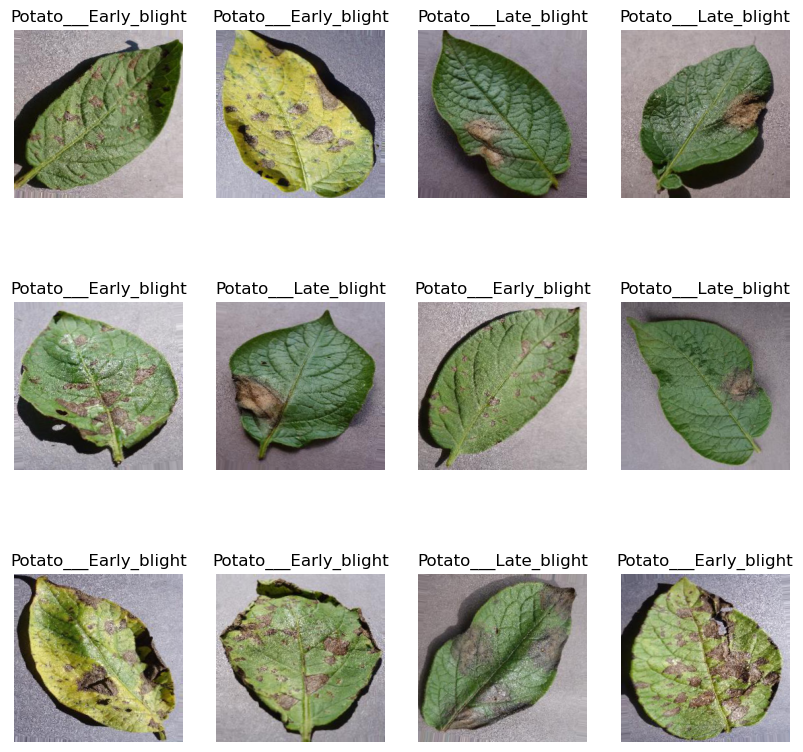

In [33]:
# Visualisation of Images from Datas in image data generator:
plt.figure(figsize=(10, 10))
for i in range(12):
    img, label = train_generator.next()
    ax = plt.subplot(3,4, i + 1)  # Here in subplot grid (3-no of rows, 4 - no of columns, i= which index to work on)
    plt.imshow(img[0])
    plt.title(class_names[int(label[0])])
    plt.axis("off")
plt.show()    

In [14]:
# Model Architecture
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [21]:
# compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
steps_per_epoch_for_train = 1722/32

In [17]:
steps_per_epoch_for_train

53.8125

In [18]:
steps_per_epoch_for_test = 430/32

In [19]:
steps_per_epoch_for_test

13.4375

In [ ]:
# Training the Model

history = model.fit(
    train_generator,
    steps_per_epoch=53,  #53 images in each batch
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=13,  # 13 images in each batch
    verbose=1,
    epochs=3, # in high gpus, u can use 50 epochs
)

Epoch 1/3
11/53 [=====>........................] - ETA: 45s - loss: 0.1413 - accuracy: 0.9432

In [ ]:
# You can see above that we get 93% accuracy for our test dataset. This is considered to be a pretty good accuracy
# If you run more epochs, then accuracy will increase correspondingly.

In [36]:
history.history

{'loss': [0.2798902094364166, 0.19644400477409363, 0.1732499897480011],
 'accuracy': [0.8840236663818359, 0.9301775097846985, 0.9331361055374146],
 'val_loss': [0.24934467673301697, 0.17538000643253326, 0.19419707357883453],
 'val_accuracy': [0.9038461446762085, 0.9375, 0.9206730723381042]}

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

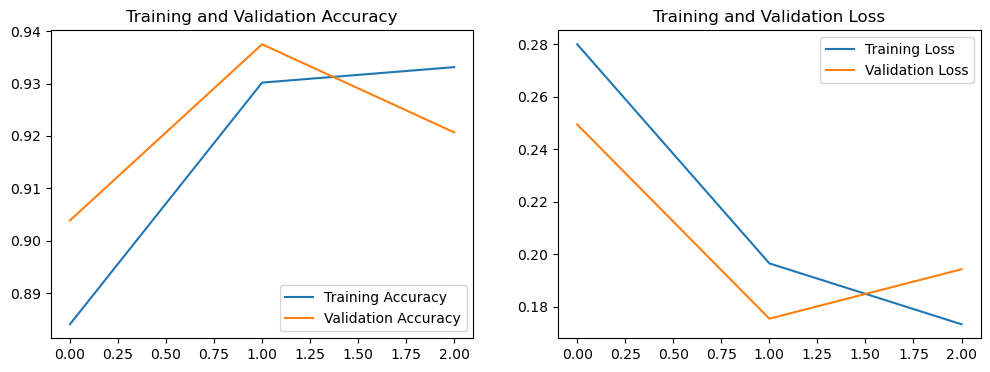

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(3), acc, label='Training Accuracy')
plt.plot(range(3), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(3), loss, label='Training Loss')
plt.plot(range(3), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

actual label: Potato___Late_blight
1/1 [==============================] - 0s 313ms/step
predicted label: Potato___Late_blight


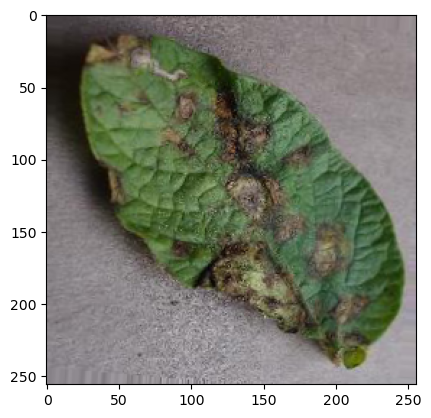

In [40]:
# Prediction on sample image

import numpy as np
for image_batch, label_batch in validation_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

In [41]:
# Creating a function for Prediction inference:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


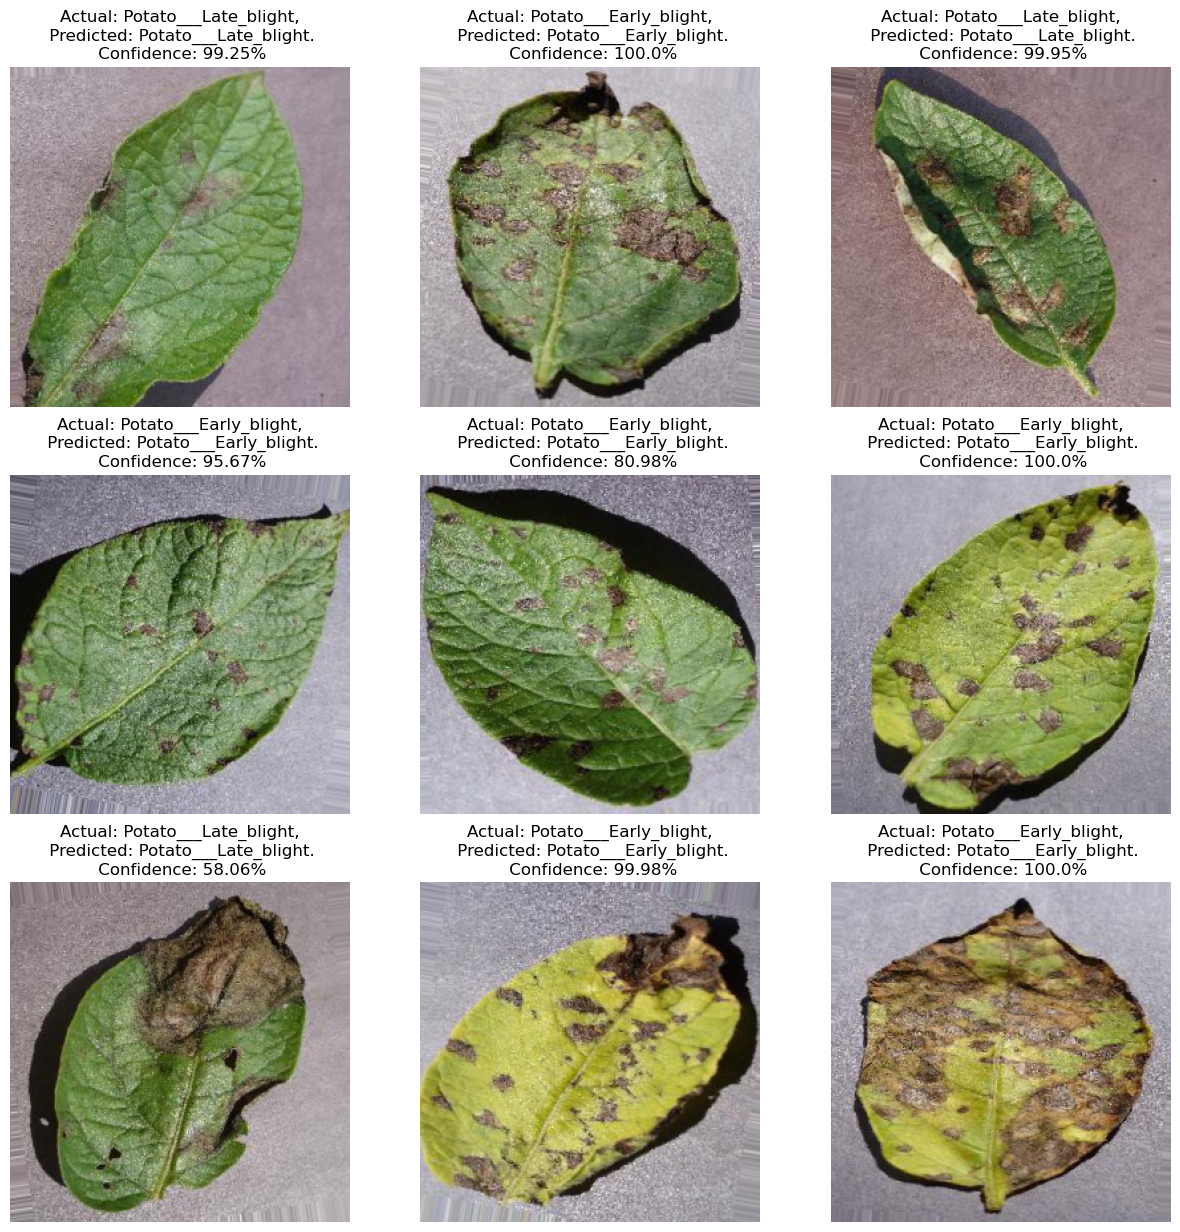

In [42]:
# Using Inference funtion to predict some images:

plt.figure(figsize=(15, 15))
for images, labels in validation_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

In [43]:
# Saving the model
# Creating a model version so that Each time, when you save a model, 
# It will save as new file by checking all existing files in that directory
import os
model_version=max([int(i) for i in os.listdir("Potato_models") + [0]])+1
model.save(f"Potato_models/{model_version}")

INFO:tensorflow:Assets written to: Potato_models/2\assets


INFO:tensorflow:Assets written to: Potato_models/2\assets


In [44]:
# Save model in h5 format so that there is just one file and we can upload that to GCP conveniently
model.save("Potato_models/potatos.h5")